# Self Organizing Maps

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
# http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head(15)
# dataset.iloc[:, 1:-1]

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,15660390,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,15663942,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [4]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

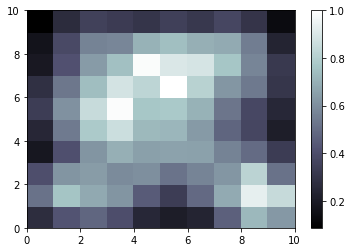

In [5]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
show()

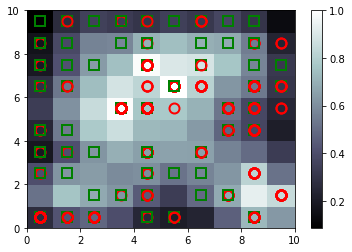

In [6]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors  = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [7]:
# Finding the frauds
mappings = som.win_map(X)
mappings[(0.9)]
frauds = np.concatenate((mappings[(0,4)], mappings[(1,3)]), axis = 0)
frauds = sc.inverse_transform(frauds)
for client in frauds:
    print(client[0])

15678882.0
15617348.0
15671769.0
15638989.0
15649430.0
15775750.0
15764226.0
15775235.0
15780088.0
15768474.0
15762045.0
15750476.0
15761047.0
15799859.0
15789014.0


---
# SimpSOM

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


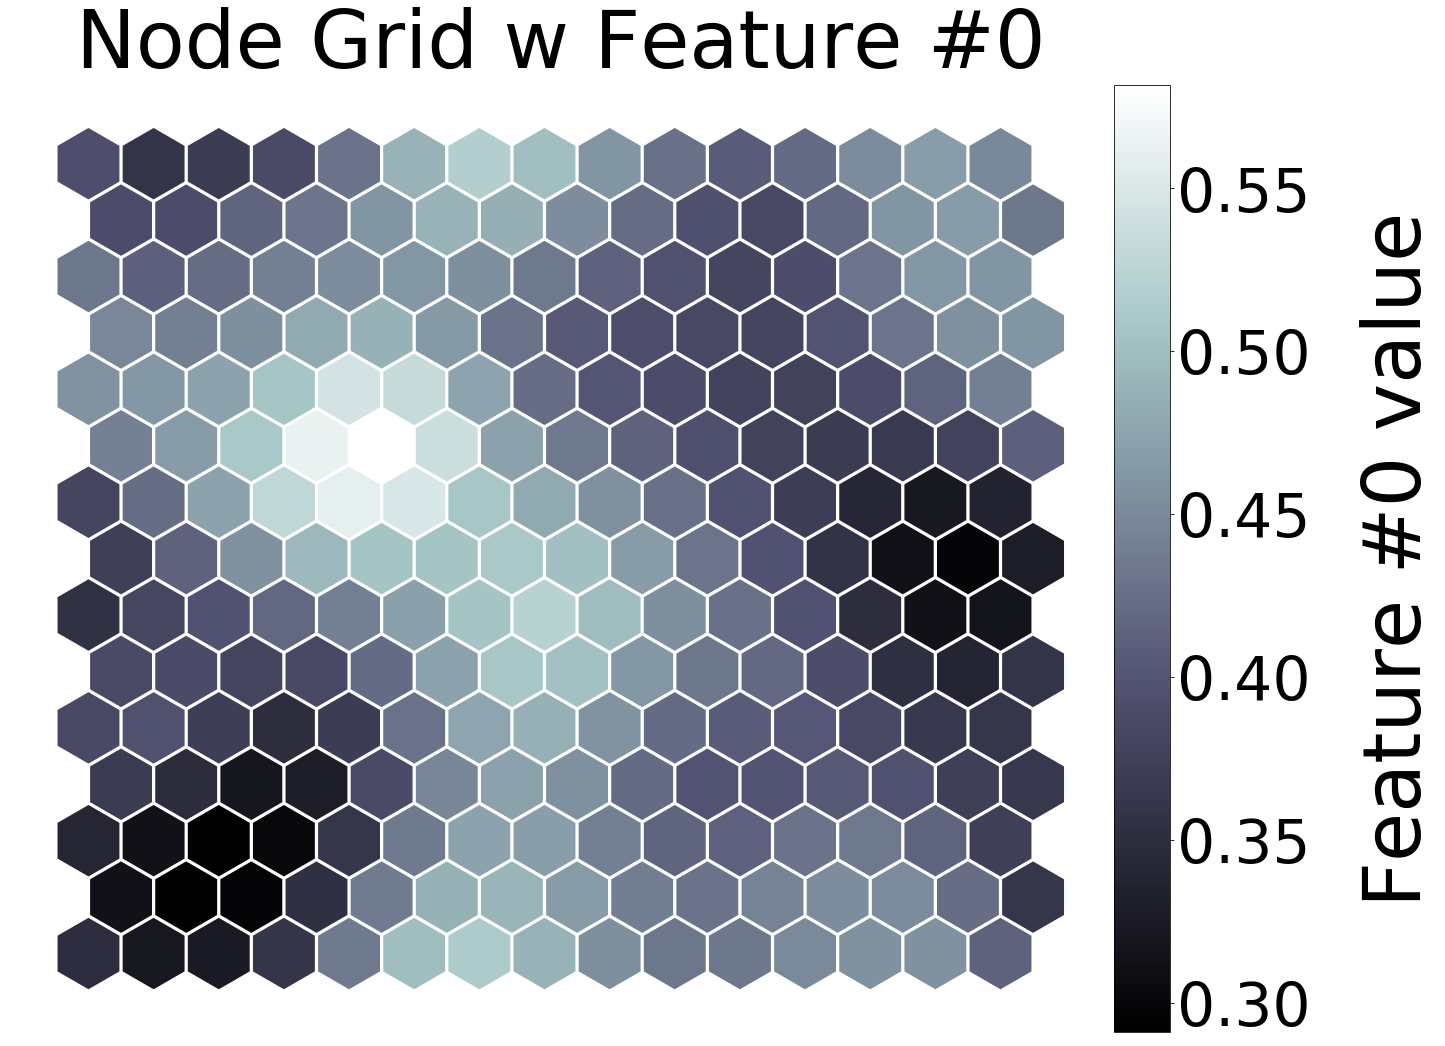

In [17]:
 ! pip install SimpSOM
import pandas as pd
import SimpSOM as sps
from sklearn.cluster import KMeans
import numpy as np

net = sps.somNet(15, 15, X, PBC=True)
net.train(0.5, 100)
# net.save(‘filename_weights’)
net.nodes_graph(colnum=0)

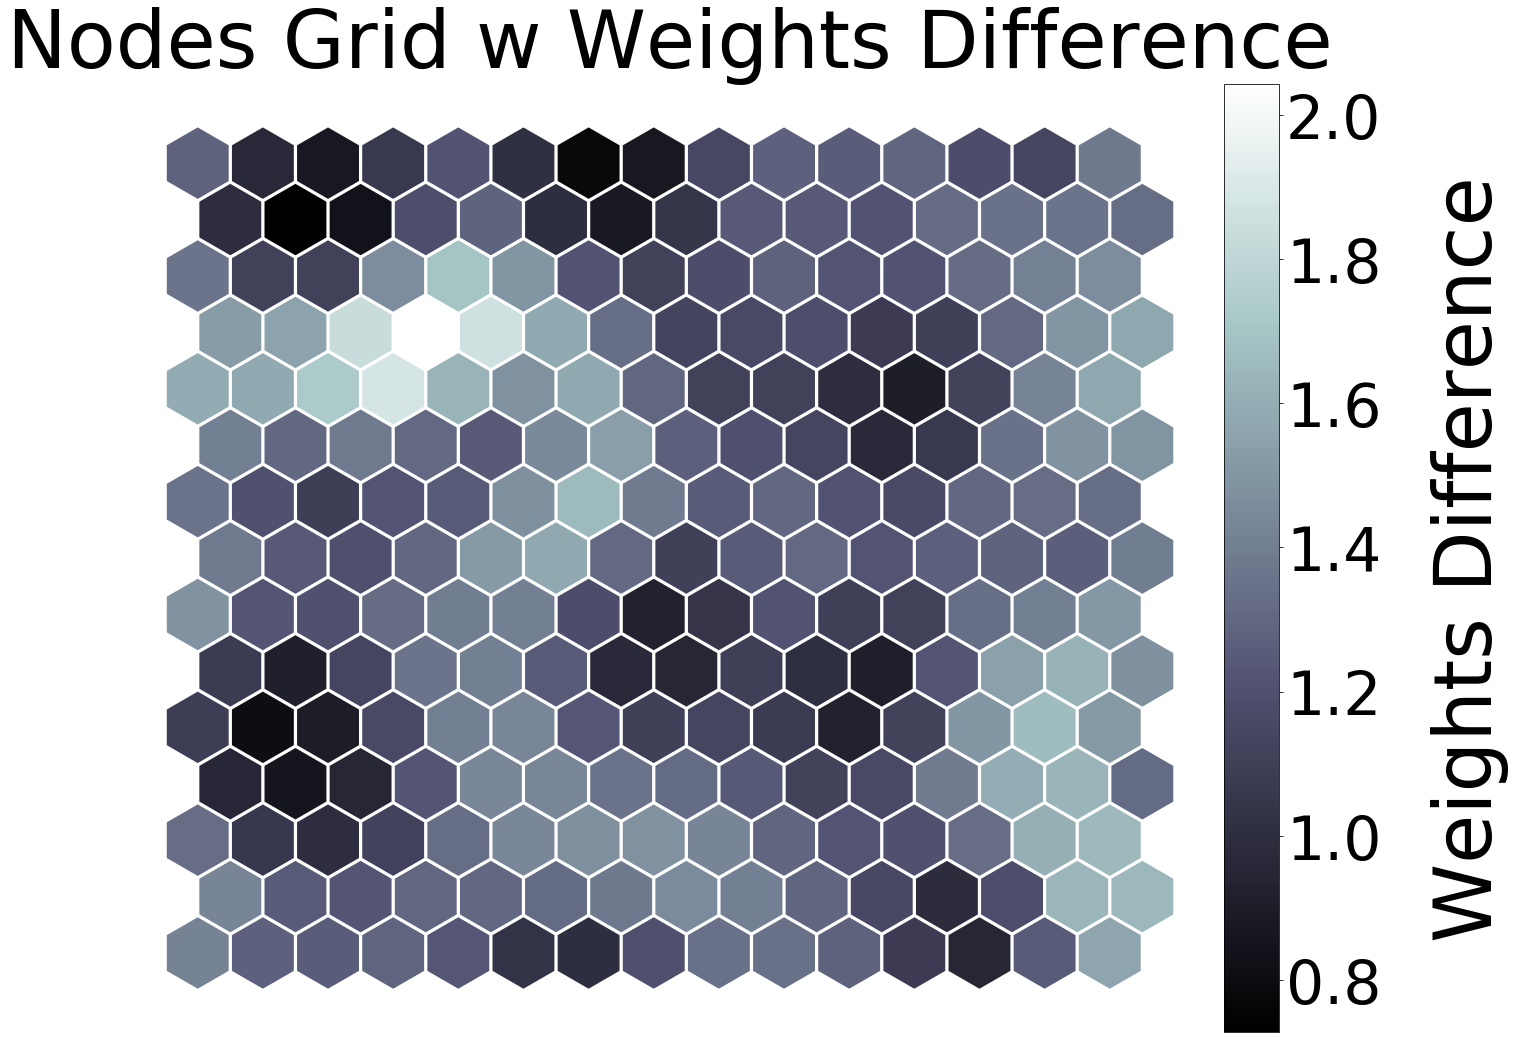

In [18]:
net.diff_graph()

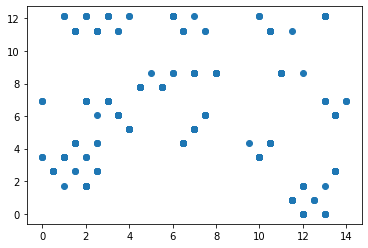

In [19]:
#Project the datapoints on the new 2D network map.
prj = np.array(net.project(X))
plt.scatter(prj.T[0], prj.T[1])
plt.show()

In [21]:
#Cluster the datapoints
kmeans = KMeans(n_clusters=2, random_state=0).fit(prj)
dataset["clusters"] = kmeans.labels_

#Where "Class" and "clusters" is 0, the card was correctly denied
dataset[dataset["clusters"]==0].head(30)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class,clusters
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1,0
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1,0
5,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1,0
7,15660390,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0,0
10,15644446,1,33.50,1.750,2,14,8,4.500,1,1,4,1,2,253,858,1,0
11,15585892,1,41.42,5.000,2,11,8,5.000,1,1,6,1,2,470,1,1,0
12,15609356,1,20.67,1.250,1,8,8,1.375,1,1,3,1,2,140,211,0,0
13,15803378,1,34.92,5.000,2,14,8,7.500,1,1,6,1,2,0,1001,1,0
16,15683168,1,29.58,4.500,2,9,4,7.500,1,1,2,1,2,330,1,1,0


In [22]:

#Where "Class" and "clusters" is 1, the card was correctly approved
dataset[dataset["clusters"]==1].head(30)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class,clusters
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0,1
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0,1
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0,1
6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0,1
8,15663942,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0,1
14,15599440,1,58.58,2.710,2,8,4,2.415,0,0,0,1,2,320,1,0,1
15,15692408,1,48.08,6.040,2,4,4,0.040,0,0,0,0,2,0,2691,1,1
18,15767729,1,20.00,1.250,1,4,4,0.125,0,0,0,0,2,140,5,0,1
20,15699839,0,28.17,0.585,2,6,4,0.040,0,0,0,0,2,260,1005,0,1
21,15786237,0,19.17,0.585,1,6,4,0.585,1,0,0,1,2,160,1,0,1
